## MODELLO 1 : Bening, DoS & Replay (All Features)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**EXAMPLE: How to Merge DIffernt Dataset: Iteration through timestamps**

We merged Cyber and Physical features belonging to the Benign CLass as an example


In [30]:
'''
file_path = '/content/drive/MyDrive/EvilTwin.xlsx'

# one dataFrame per sheet
df1 = pd.read_excel(file_path, sheet_name='CyberFeature', index_col=0)
df2 = pd.read_excel(file_path, sheet_name='PhysicalFeature', index_col=0)


df1 = df1[pd.to_numeric(df1.index, errors='coerce').notna()]
df2 = df2[pd.to_numeric(df2.index, errors='coerce').notna()]

#conversion to datetime of the index
df1.index = pd.to_datetime(df1.index.astype(float), unit='s')
df2.index = pd.to_datetime(df2.index.astype(float), unit='s')


merged_df = pd.merge_asof(df1.sort_index(), df2.sort_index(), left_index=True, right_index=True, direction='nearest')

#merged_df.to_csv('/content/drive/MyDrive/Merged_EvilTwin_Dataset.csv')

merged_df.head()
'''

"\nfile_path = '/content/drive/MyDrive/EvilTwin.xlsx'\n\n# one dataFrame per sheet\ndf1 = pd.read_excel(file_path, sheet_name='CyberFeature', index_col=0)\ndf2 = pd.read_excel(file_path, sheet_name='PhysicalFeature', index_col=0)\n\n\ndf1 = df1[pd.to_numeric(df1.index, errors='coerce').notna()]\ndf2 = df2[pd.to_numeric(df2.index, errors='coerce').notna()]\n\n#conversion to datetime of the index\ndf1.index = pd.to_datetime(df1.index.astype(float), unit='s')\ndf2.index = pd.to_datetime(df2.index.astype(float), unit='s')\n\n\nmerged_df = pd.merge_asof(df1.sort_index(), df2.sort_index(), left_index=True, right_index=True, direction='nearest')\n\n#merged_df.to_csv('/content/drive/MyDrive/Merged_EvilTwin_Dataset.csv')\n\nmerged_df.head()\n"

**From Now on we used the Merged_Dataset**

Here we removed the TImestamp Column and Barometer column to avoid useless data

In [5]:
import os
import pandas as pd
import numpy as np


file_path ='/content/drive/MyDrive/Merged_Dataset.csv'
dataset = pd.read_csv(file_path)


dataset.head()



,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,wlan.frag,...,roll,yaw,temperature,distance,flight_time,battery,mp_distance_x,mp_distance_y,mp_distance_z,class
0,60,24,0,0,1,1,1,1,0,0,...,0,0,68,84,7,65,-15,-5,86,benign
1,61,24,0,0,1,1,1,1,0,0,...,0,0,68,84,7,65,-15,-5,86,benign
2,75,104,0,0,4,1,4,1,0,0,...,0,0,68,84,7,65,-15,-5,86,benign
3,122,86,2,44,1,0,1,0,0,0,...,0,0,68,84,7,65,-15,-5,86,benign
4,124,26,0,60,1,0,1,0,0,0,...,0,0,68,84,7,65,-15,-5,86,benign


# **DA - Exploratory Data Analysis**


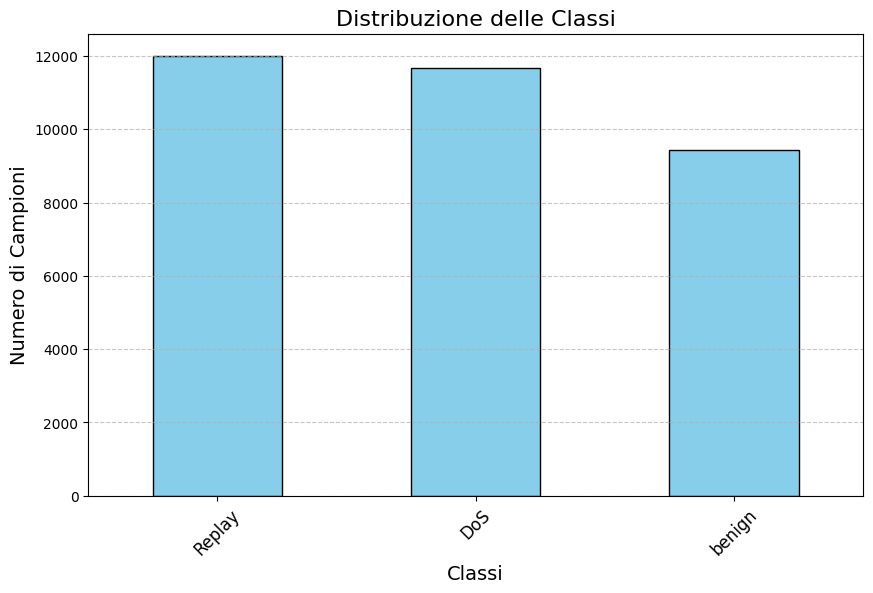

{'Numero di righe': 33102,
 'Numero di colonne': 51,
 'Valori mancanti': np.int64(0),
 'Distribuzione delle classi': {'Replay': 12006, 'DoS': 11671, 'benign': 9425}}

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


class_counts = dataset['class'].value_counts()

#grafico a barre
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuzione delle Classi', fontsize=16)
plt.xlabel('Classi', fontsize=14)
plt.ylabel('Numero di Campioni', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




class_distribution = dataset['class'].value_counts()


missing_values = dataset.isnull().sum()


summary = {
    'Numero di righe': dataset.shape[0],
    'Numero di colonne': dataset.shape[1],
    'Valori mancanti': missing_values.sum(),
    'Distribuzione delle classi': class_distribution.to_dict()
}

summary

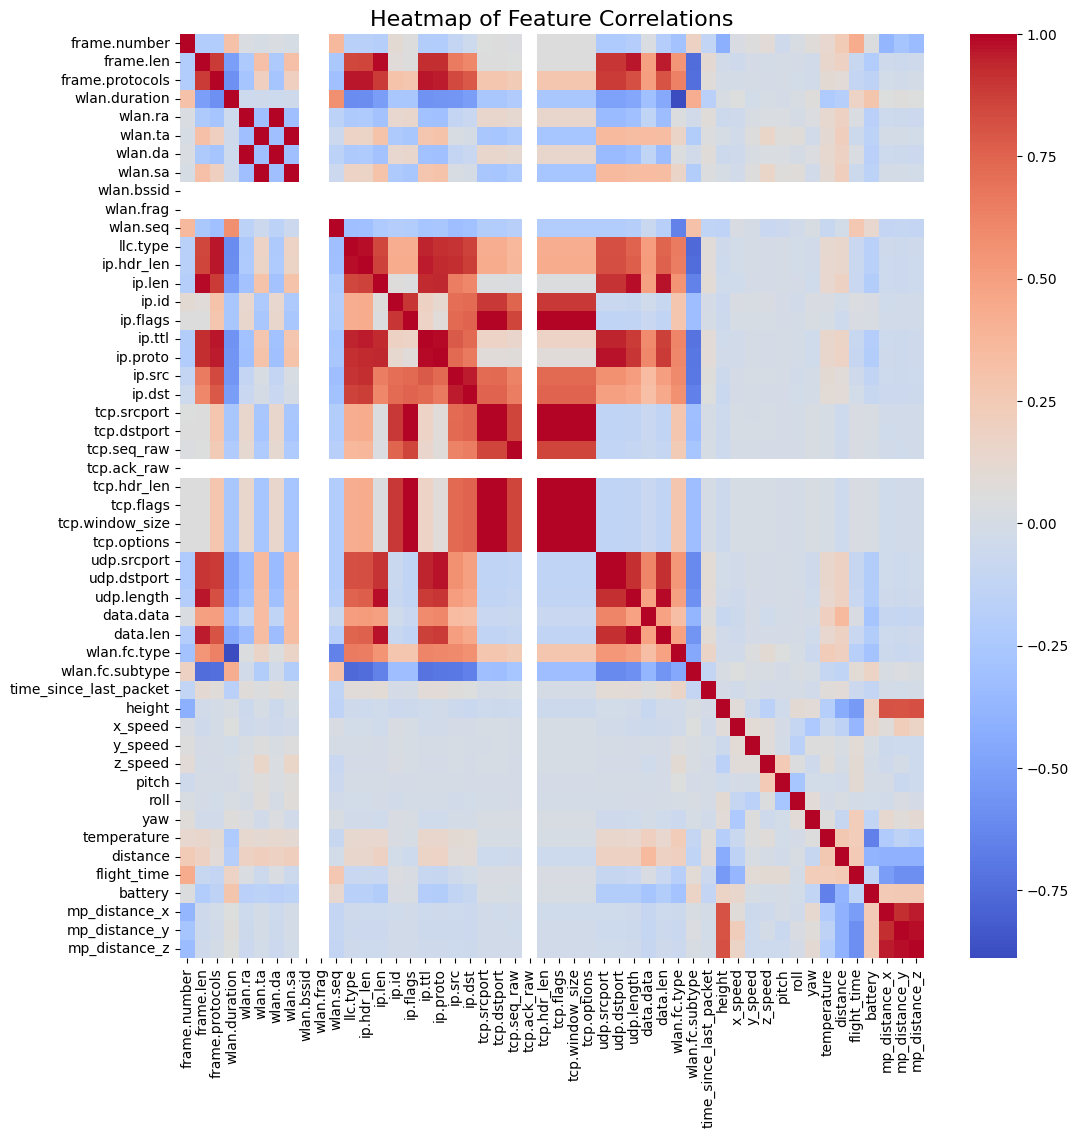

In [33]:


#heatmap
plt.figure(figsize=(12, 12))
numeric_dataset = dataset.select_dtypes(include=np.number)
correlation_matrix = numeric_dataset.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Feature Correlations', fontsize=16)
plt.show()



# **Decision Tree Model**

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline



# Divisione in training e test set
X = dataset.drop(columns=['class','frame.number'])
y = dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Encoding della variabile target SOLO sul training set
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



#---Min-Max---#

pipeline_min_max = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])



pipeline_min_max.fit(X_train, y_train_encoded)

# predizioni sul test set
y_pred = pipeline_min_max.predict(X_test)



#--- Metriche Min-Max--#

print("Classification Report (Min-Max Norm):")
print(classification_report(y_test_encoded, y_pred))
print("Accuracy on Test Set(Min-Max Norm):", accuracy_score(y_test_encoded, y_pred))

# Cross-validation con Stratified K-Fold sul training set
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_min_max = cross_val_score(pipeline_min_max, X_train, y_train_encoded, cv=stratified_kfold, scoring='accuracy')
print("10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max stratified):", cv_scores_min_max)
print("Average Stratified Cross-Validation Accuracy (Min-Max stratified):", cv_scores_min_max.mean())
print("\n" + "="*50 + "\n")

# Cross-validation sul training set con MinMax
cv_scores = cross_val_score(pipeline_min_max, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores on Training Set (Min-Max  NOT stratified):", cv_scores)
print("Average Cross-Validation Accuracy (Min-Max  NOT stratified):", cv_scores.mean())
print("\n" + "="*50 + "\n")





#-- Z-Score---#



pipeline_z_score = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])



pipeline_z_score.fit(X_train, y_train_encoded)


y_pred_score = pipeline_z_score.predict(X_test)


#---Metriche Z-Score --#
print("Classification Report (Z-Score):")
print(classification_report(y_test_encoded, y_pred_score))
print("Accuracy on Test Set (Z-Score):", accuracy_score(y_test_encoded, y_pred_score) )

# Cross-validation with Z-score normalization
cv_scores_z = cross_val_score(pipeline_z_score, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores (Z-Score):", cv_scores_z)
print("Average Cross-Validation Accuracy (Z-Score):", cv_scores_z.mean())



Classification Report (Min-Max Norm):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3528
           1       1.00      1.00      1.00      3569
           2       0.99      1.00      1.00      2834

    accuracy                           1.00      9931
   macro avg       1.00      1.00      1.00      9931
weighted avg       1.00      1.00      1.00      9931

Accuracy on Test Set(Min-Max Norm): 0.9964756822072299
10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max stratified): [0.99137187 0.99179974 0.99352611 0.99482089 0.98921019 0.98877859
 0.99309452 0.99136815 0.99179974 0.99223133]
Average Stratified Cross-Validation Accuracy (Min-Max stratified): 0.9918001134280404


10-Fold Cross-Validation Scores on Training Set (Min-Max  NOT stratified): [0.99094047 0.99266293 0.9943893  0.99007337 0.9943893  0.99352611
 0.98964178 0.99309452 0.99136815 0.99611567]
Average Cross-Validation Accuracy (Min-Max  NOT stratifi

**ROC & AUC**

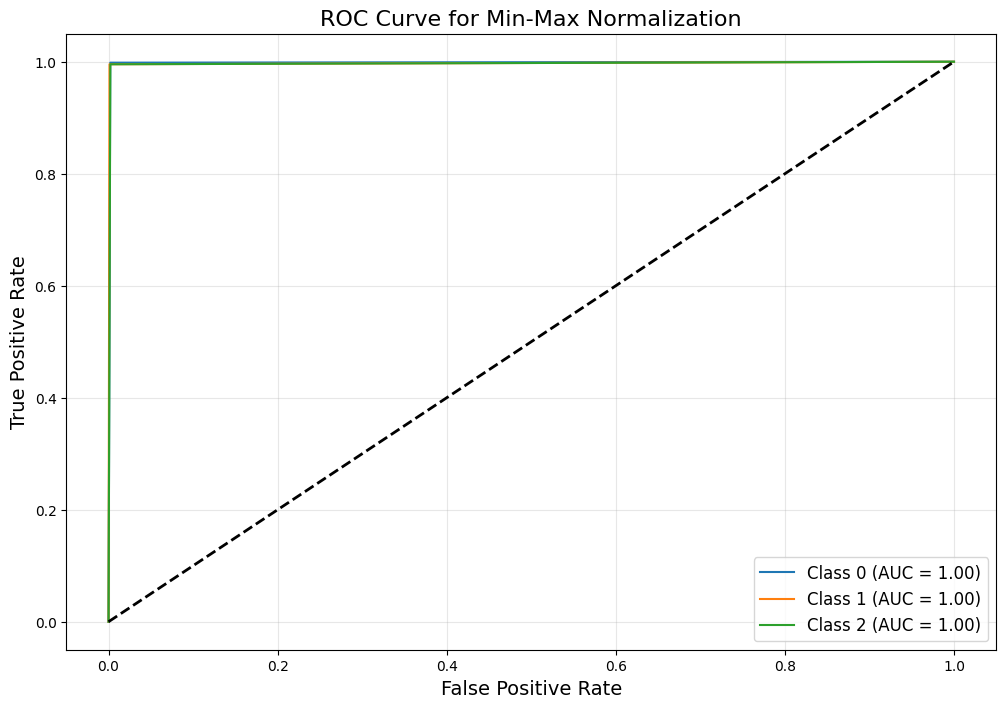

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the target variable for ROC curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_encoded)

# Generate predicted probabilities for Min-Max
y_prob_minmax = pipeline_min_max.predict_proba(X_test)

# ---- ROC Curve for Min-Max Normalization ---- #
plt.figure(figsize=(12, 8))


for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_minmax[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Min-Max Normalization', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


**Let's rerun the model but applying PCA anlysis to it**

In [36]:


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import numpy as np




X = dataset.drop(columns=['class', 'frame.number'])
y = dataset['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encoding della variabile target SOLO sul training set
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


pipeline_pca = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95)),     #mantiene il 95% della varianza
    ('classifier', DecisionTreeClassifier(random_state=42))
])


pipeline_pca.fit(X_train, y_train_encoded)


y_pred_pca = pipeline_pca.predict(X_test)


# Number of components chosen by PCA
pca_model = pipeline_pca.named_steps['pca']
print(f"Number of components after PCA: {pca_model.n_components_}")




# Valutazione del modello con PCA+MinMax
print("Classification Report (Pipeline with PCA):")
print(classification_report(y_test_encoded, y_pred_pca))
print("Accuracy on Test Set (Pipeline with PCA):", accuracy_score(y_test_encoded, y_pred_pca))

# Cross-validation con Stratified K-Fold sul training set
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_pca_stratified = cross_val_score(pipeline_pca, X_train, y_train_encoded, cv=stratified_kfold, scoring='accuracy')
print("10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max stratified):", cv_scores_pca_stratified)
print("Average Stratified Cross-Validation Accuracy (Min-Max stratified):", cv_scores_pca_stratified.mean())
print("\n" + "="*50 + "\n")

# Cross-validation sul training set con PCA+MinMax
cv_scores_pca = cross_val_score(pipeline_pca, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores on Training Set (Pipeline with PCA):", cv_scores_pca)
print("Average Cross-Validation Accuracy (Pipeline with PCA):", cv_scores_pca.mean())
print("\n" + "="*50 + "\n")



# ---- PCA with Z-Score Normalization ---- #

# Pipeline con Z-Score Normalization + PCA
pipeline_zscore_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Addestramento della pipeline con Z-Score + PCA
pipeline_zscore_pca.fit(X_train, y_train_encoded)

# Predizioni sul test set con Z-Score + PCA
y_pred_zscore_pca = pipeline_zscore_pca.predict(X_test)



# Valutazione del modello con Z-Score + PCA
print("Classification Report (Z-Score + PCA):")
print(classification_report(y_test_encoded, y_pred_zscore_pca))
print("Accuracy on Test Set(Z-Score + PCA):", accuracy_score(y_test_encoded, y_pred_zscore_pca))

#Cross-validation con Z-Score + PCA
cv_scores_zscore_pca = cross_val_score(pipeline_zscore_pca, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores(Z-Score + PCA):", cv_scores_zscore_pca)
print("Average Cross-Validation Accuracy (Z-Score + PCA):", cv_scores_zscore_pca.mean())



pca_model_zscore = pipeline_zscore_pca.named_steps['pca']
print(f"\nNumber of features before PCA: {X_train.shape[1]}")
print(f"Number of features after PCA (Min-Max): {pca_model.n_components_}")
print(f"Number of features after PCA(Z-Score): {pca_model_zscore.n_components_}")


Number of components after PCA: 10
Classification Report (Pipeline with PCA):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3528
           1       0.98      0.97      0.97      3569
           2       0.96      0.95      0.96      2834

    accuracy                           0.97      9931
   macro avg       0.97      0.97      0.97      9931
weighted avg       0.97      0.97      0.97      9931

Accuracy on Test Set (Pipeline with PCA): 0.9688853086295438
10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max stratified): [0.9663503  0.96719896 0.9594303  0.96115667 0.95727233 0.96417782
 0.96158826 0.96201985 0.97022011 0.96719896]
Average Stratified Cross-Validation Accuracy (Min-Max stratified): 0.9636613573456201


10-Fold Cross-Validation Scores on Training Set (Pipeline with PCA): [0.95685936 0.96288304 0.95813552 0.96331463 0.95856711 0.96158826
 0.96158826 0.96590419 0.96978852 0.96676737]
Average Cross-Va

**ROC & AUC with PCA**

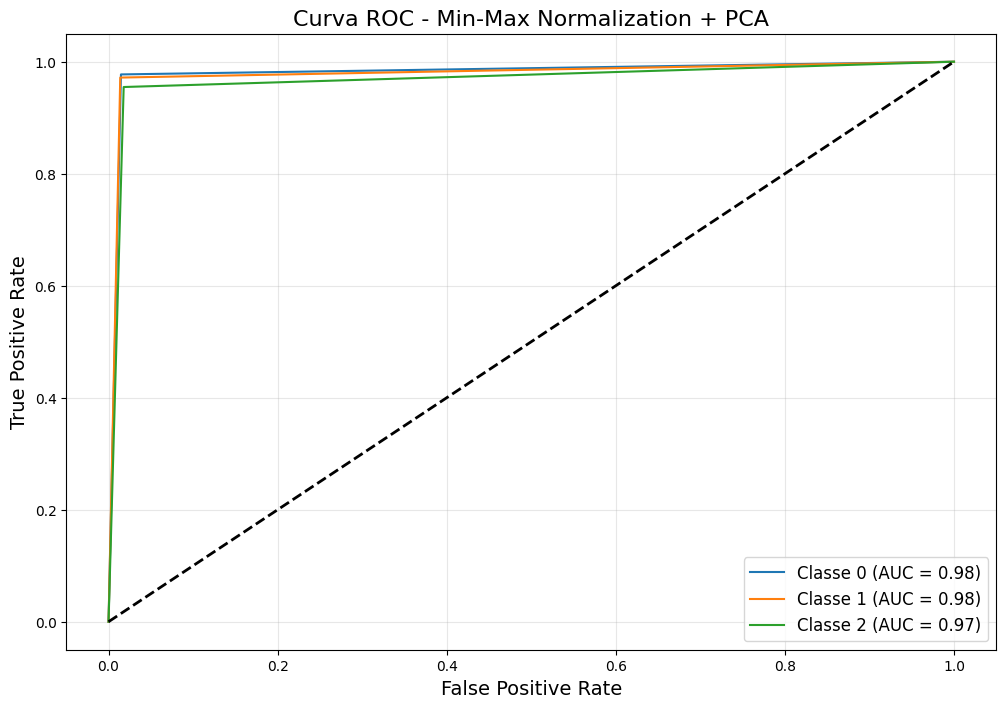

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarizzazione della variabile target per la curva ROC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_encoded)


y_prob_pca = pipeline_pca.predict_proba(X_test)


plt.figure(figsize=(12, 8))


for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_pca[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Classe {i} (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], 'k--', lw=2)


plt.title('Curva ROC - Min-Max Normalization + PCA', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


**CONFUSION MATRIX PCA**

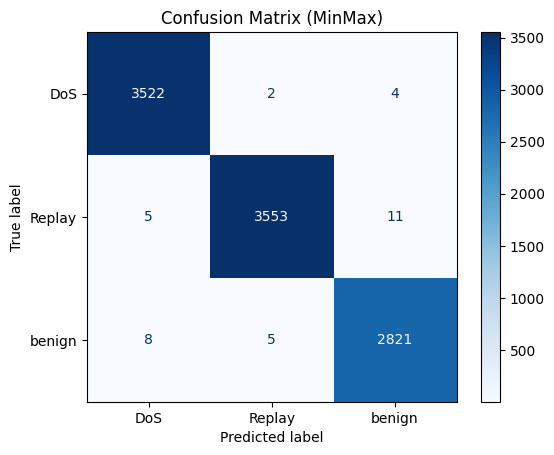

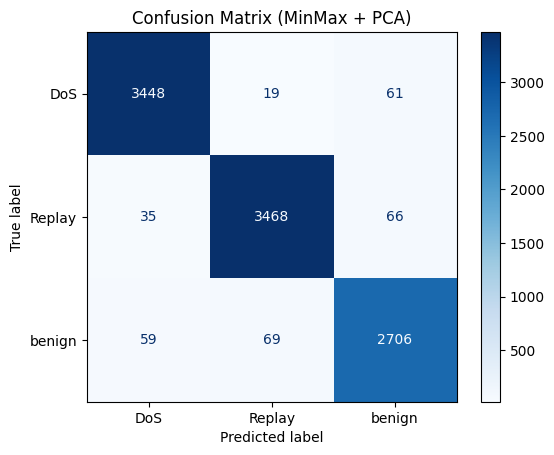

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (MinMax)")
plt.show()


conf_matrix = confusion_matrix(y_test_encoded, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (MinMax + PCA)")
plt.show()

**FEATURE IMPORTANCE**




<ipython-input-39-56238e599788>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


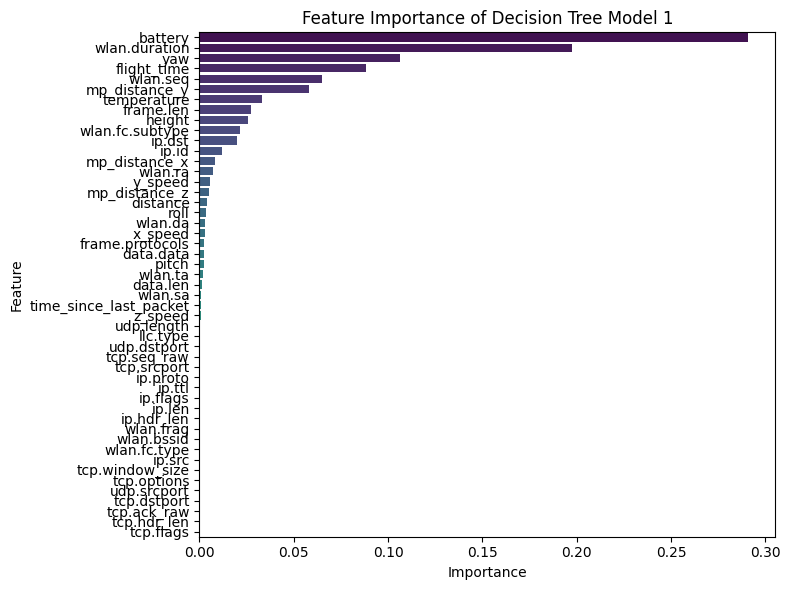

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dt_model = pipeline_min_max.named_steps['classifier']


if hasattr(dt_model, 'feature_importances_'):

    feature_importances = dt_model.feature_importances_


    features_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)


    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
    plt.title('Feature Importance of Decision Tree Model 1')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("The model does not have feature importances. Ensure the classifier is a DecisionTreeClassifier.")


#**Naive Bayesian Classifier**


In [46]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline


X = dataset.drop(columns=['class', 'frame.number'])
y = dataset['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


pipeline_minmax_nb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', GaussianNB())
])


pipeline_minmax_nb.fit(X_train, y_train_encoded)


y_pred_minmax = pipeline_minmax_nb.predict(X_test)

print("Metrics for Min-Max Normalization:")
print("Classification Report (Min-Max):")
print(classification_report(y_test_encoded, y_pred_minmax))
print("Accuracy on Test Set (Min-Max):", accuracy_score(y_test_encoded, y_pred_minmax))


stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_minmax_stratified = cross_val_score(pipeline_minmax_nb, X_train, y_train_encoded, cv=stratified_kfold, scoring='accuracy')
print("10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max stratified):", cv_scores_minmax_stratified)
print("Average Stratified Cross-Validation Accuracy (Min-Max stratified):", cv_scores_minmax_stratified.mean())
print("\n" + "="*50 + "\n")

cv_scores_minmax = cross_val_score(pipeline_minmax_nb, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores (Min-Max):", cv_scores_minmax)
print("Average Cross-Validation Accuracy (Min-Max):", cv_scores_minmax.mean())
print("\n" + "="*50 + "\n")


# -- Z-Score Normalization --


# Pipeline con Z-Score Normalization + Naive Bayes
pipeline_zscore_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

pipeline_zscore_nb.fit(X_train, y_train_encoded)

y_pred_zscore = pipeline_zscore_nb.predict(X_test)

print("Metrics for Z-Score Normalization:")
print("Classification Report (Z-Score):")
print(classification_report(y_test_encoded, y_pred_zscore))
print("Accuracy on Test Set (Z-Score):", accuracy_score(y_test_encoded, y_pred_zscore))

cv_scores_zscore = cross_val_score(pipeline_zscore_nb, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores (Z-Score):", cv_scores_zscore)
print("Average Cross-Validation Accuracy (Z-Score):", cv_scores_zscore.mean())
print("\n" + "="*50 + "\n")

Metrics for Min-Max Normalization:
Classification Report (Min-Max):
              precision    recall  f1-score   support

           0       0.46      0.80      0.58      3528
           1       0.60      0.15      0.24      3569
           2       0.68      0.70      0.69      2834

    accuracy                           0.54      9931
   macro avg       0.58      0.55      0.51      9931
weighted avg       0.58      0.54      0.49      9931

Accuracy on Test Set (Min-Max): 0.5387171483234316
10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max stratified): [0.53278689 0.53215365 0.51014243 0.53517479 0.52870091 0.52524817
 0.53085887 0.5347432  0.52999568 0.53215365]
Average Stratified Cross-Validation Accuracy (Min-Max stratified): 0.5291958227498815


10-Fold Cross-Validation Scores (Min-Max): [0.53839517 0.52524817 0.54466983 0.52999568 0.51963746 0.51359517
 0.5291325  0.5347432  0.53129046 0.5230902 ]
Average Cross-Validation Accuracy (Min-Max): 0.528979784412246

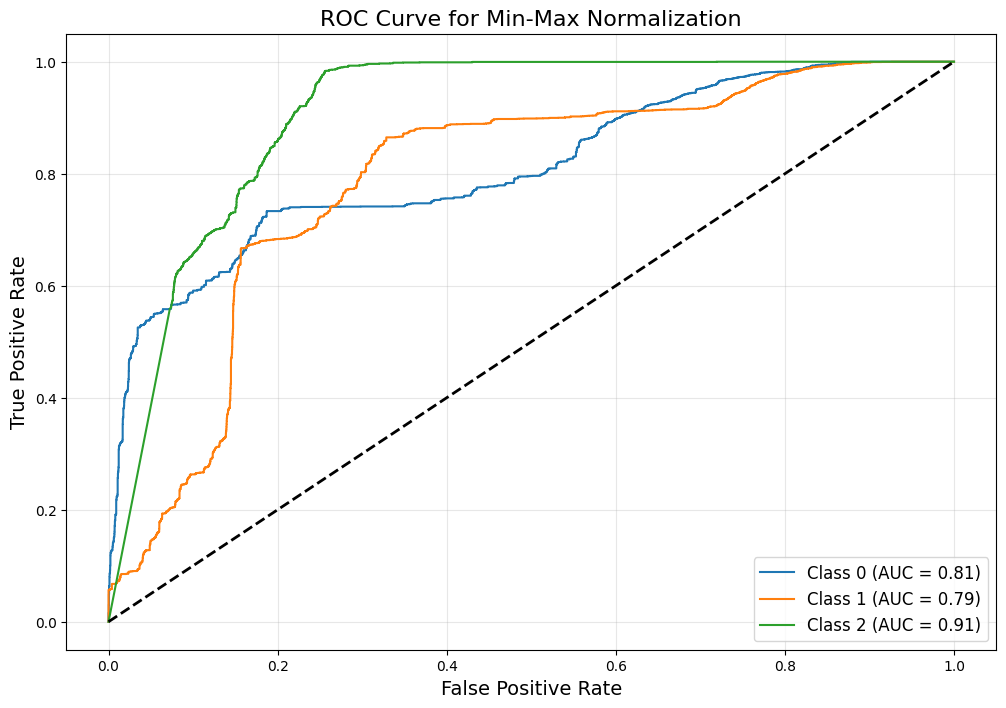

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Binarize the target variable for ROC curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_encoded)


y_prob_minmax = pipeline_minmax_nb.predict_proba(X_test)

# ---- ROC Curve for Min-Max Normalization ---- #
plt.figure(figsize=(12, 8))


for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_minmax[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Min-Max Normalization', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


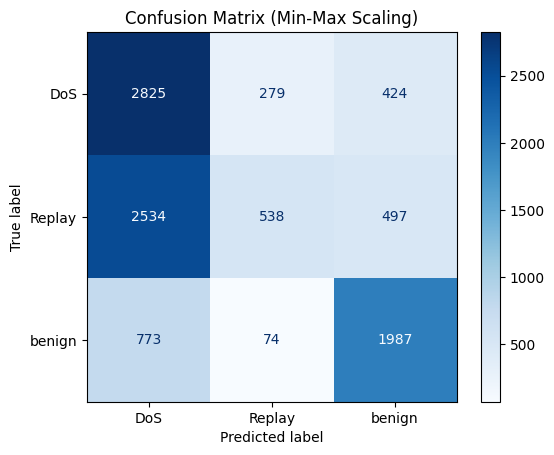

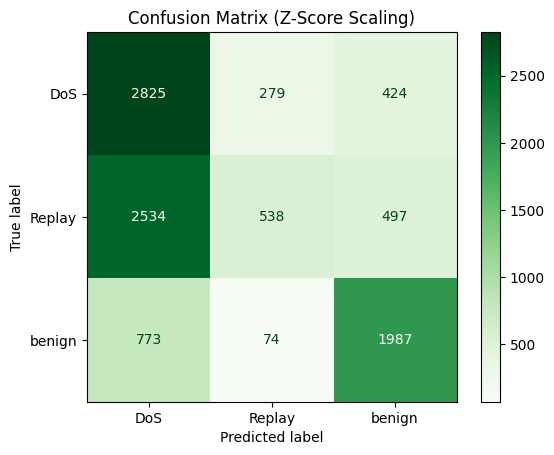

In [48]:

conf_matrix_minmax = confusion_matrix(y_test_encoded, y_pred_minmax)
disp_minmax = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_minmax, display_labels=label_encoder.classes_)
disp_minmax.plot(cmap='Blues')
plt.title("Confusion Matrix (Min-Max Scaling)")
plt.show()


conf_matrix_zscore = confusion_matrix(y_test_encoded, y_pred_zscore)
disp_zscore = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_zscore, display_labels=label_encoder.classes_)
disp_zscore.plot(cmap='Greens')
plt.title("Confusion Matrix (Z-Score Scaling)")
plt.show()

**Let's rerun the model but applyign PCA**


In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score


X = dataset.drop(columns=['class', 'frame.number'])
y = dataset['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Pipeline con Min-Max Scaling + PCA + Naive Bayes
pipeline_minmax_pca_nb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', GaussianNB())
])


pipeline_minmax_pca_nb.fit(X_train, y_train_encoded)


y_pred_minmax_pca = pipeline_minmax_pca_nb.predict(X_test)


print(f"Numero di feature prima della PCA (Min-Max): {X_train.shape[1]}")
print(f"Numero di feature dopo la PCA (Min-Max): {pipeline_minmax_pca_nb.named_steps['pca'].n_components_}")

print("Metrics for Min-Max Normalization with PCA:")
print("Classification Report (Min-Max + PCA):")
print(classification_report(y_test_encoded, y_pred_minmax_pca))
print("Accuracy on Test Set (Min-Max + PCA):", accuracy_score(y_test_encoded, y_pred_minmax_pca))

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_minmax_stratified_pca = cross_val_score(pipeline_minmax_pca_nb, X_train, y_train_encoded, cv=stratified_kfold, scoring='accuracy')
print("10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max + PCA + stratified):", cv_scores_minmax_stratified_pca)
print("Average Stratified Cross-Validation Accuracy (Min-Max + PCA + stratified):", cv_scores_minmax_stratified_pca.mean())
print("\n" + "="*50 + "\n")

cv_scores_minmax_pca = cross_val_score(pipeline_minmax_pca_nb, X_train, y_train_encoded, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Scores (Min-Max + PCA):", cv_scores_minmax_pca)
print("Average Cross-Validation Accuracy (Min-Max + PCA):", cv_scores_minmax_pca.mean())
print("\n" + "="*50 + "\n")


pipeline_zscore_pca_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', GaussianNB())
])

pipeline_zscore_pca_nb.fit(X_train, y_train_encoded)

y_pred_zscore_pca = pipeline_zscore_pca_nb.predict(X_test)

print(f"Numero di feature prima della PCA (Z-Score): {X_train.shape[1]}")
print(f"Numero di feature dopo la PCA (Z-Score): {pipeline_zscore_pca_nb.named_steps['pca'].n_components_}")

print("Metrics for Z-Score Normalization with PCA:")
print("Classification Report (Z-Score + PCA):")
print(classification_report(y_test_encoded, y_pred_zscore_pca))
print("Accuracy on Test Set (Z-Score + PCA):", accuracy_score(y_test_encoded, y_pred_zscore_pca))


Numero di feature prima della PCA (Min-Max): 49
Numero di feature dopo la PCA (Min-Max): 10
Metrics for Min-Max Normalization with PCA:
Classification Report (Min-Max + PCA):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      3528
           1       0.66      0.57      0.61      3569
           2       0.71      0.72      0.72      2834

    accuracy                           0.69      9931
   macro avg       0.69      0.69      0.69      9931
weighted avg       0.69      0.69      0.69      9931

Accuracy on Test Set (Min-Max + PCA): 0.6907662873829423
10-Fold Stratified Cross-Validation Scores on Training Set (Min-Max + PCA + stratified): [0.67601381 0.68450583 0.67069486 0.68105309 0.67371601 0.67026327
 0.67069486 0.69443246 0.69313768 0.69831679]
Average Stratified Cross-Validation Accuracy (Min-Max + PCA + stratified): 0.6812828651788949


10-Fold Cross-Validation Scores (Min-Max + PCA): [0.68162209 0.68536901 0.6858006  0.6685

**Accuracy increases in both min-max and z-score normalization**

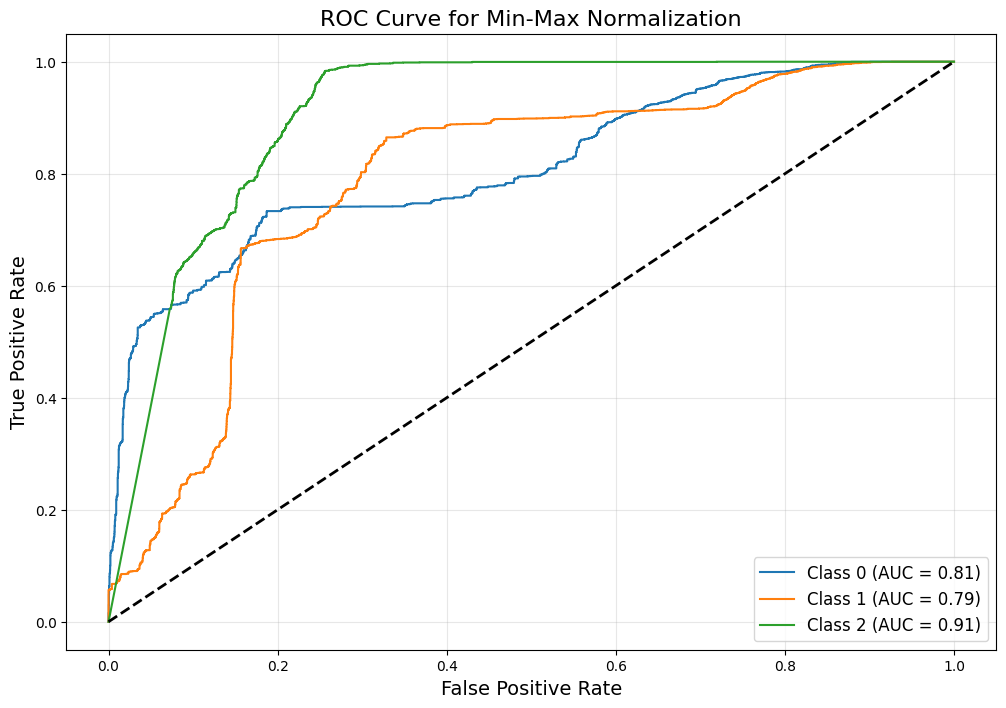

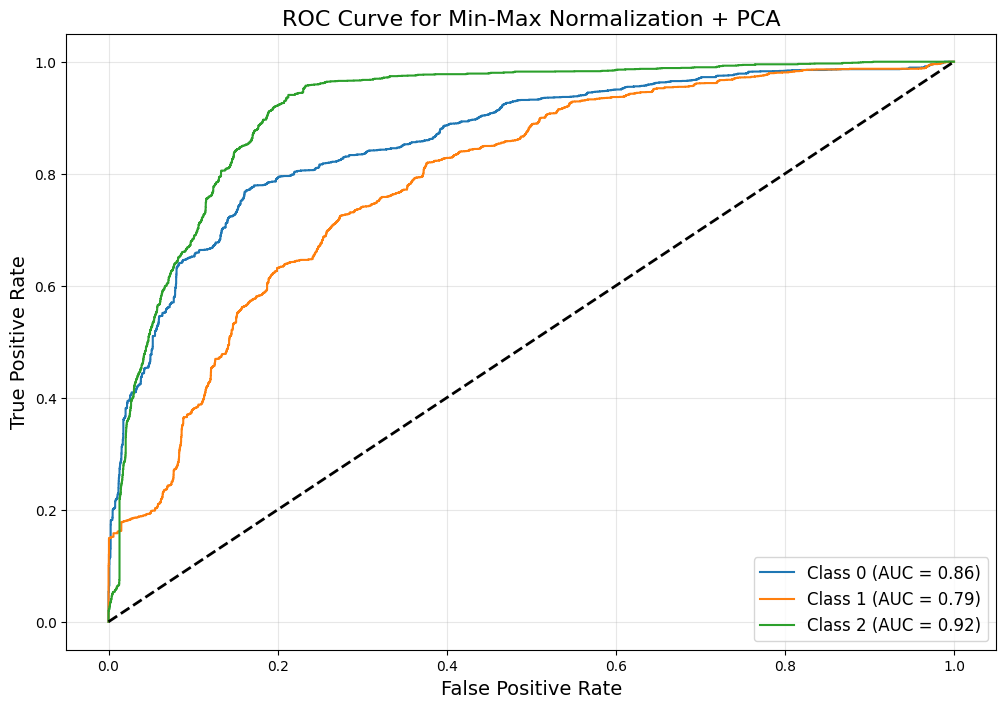

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
#-------ROC for Min-Max------------------#

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt


lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_encoded)


y_prob_minmax = pipeline_minmax_nb.predict_proba(X_test)

# ---- ROC Curve for Min-Max Normalization ---- #
plt.figure(figsize=(12, 8))


for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_minmax[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Min-Max Normalization', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()






#-------ROC for Min-Max + PCA -----------#


lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_encoded)

y_prob_minmax_pca = pipeline_minmax_pca_nb.predict_proba(X_test)

# ---- ROC Curve for Min-Max Normalization + PCA ---- #
plt.figure(figsize=(12, 8))


for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_minmax_pca[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.title('ROC Curve for Min-Max Normalization + PCA', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**CONFUSION MATRIX**

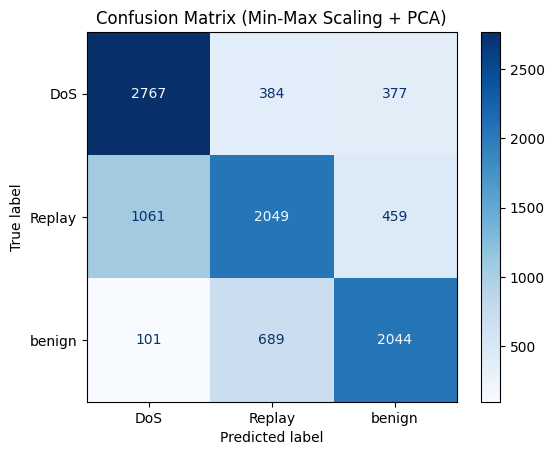

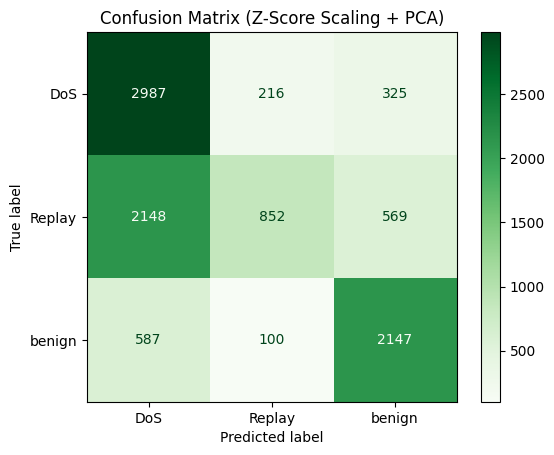

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


conf_matrix_minmax_pca = confusion_matrix(y_test_encoded, y_pred_minmax_pca)
disp_minmax_pca = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_minmax_pca, display_labels=label_encoder.classes_)
disp_minmax_pca.plot(cmap='Blues')
plt.title("Confusion Matrix (Min-Max Scaling + PCA)")
plt.show()


conf_matrix_zscore_pca = confusion_matrix(y_test_encoded, y_pred_zscore_pca)
disp_zscore_pca = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_zscore_pca, display_labels=label_encoder.classes_)
disp_zscore_pca.plot(cmap='Greens')
plt.title("Confusion Matrix (Z-Score Scaling + PCA)")
plt.show()


#**MULTI LAYER FEED FORWARD NEURAL NETWORK**

In [7]:
#!pip install tensorflow --upgrade --force-reinstall
#pip install scikeras --upgrade --force-reinstall

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.6247 - loss: 0.7835 - val_accuracy: 0.7931 - val_loss: 0.4835
Epoch 2/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7820 - loss: 0.5071 - val_accuracy: 0.8382 - val_loss: 0.3925
Epoch 3/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8235 - loss: 0.4207 - val_accuracy: 0.8572 - val_loss: 0.3411
Epoch 4/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8495 - loss: 0.3728 - val_accuracy: 0.8867 - val_loss: 0.2969
Epoch 5/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8621 - loss: 0.3429 - val_accuracy: 0.8753 - val_loss: 0.3028
Epoch 6/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8775 - loss: 0.3045 - val_accuracy: 0.9046 - val_loss: 0.2560
Epoch 7/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8795 - loss: 0.2998 - val_accuracy: 0.8962 - val_loss: 0.2609
Epoch 8/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8912 - loss: 0.2749 - val_accuracy: 

<Figure size 800x600 with 0 Axes>

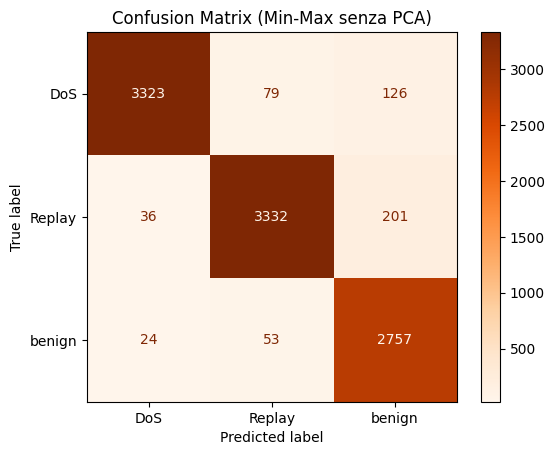

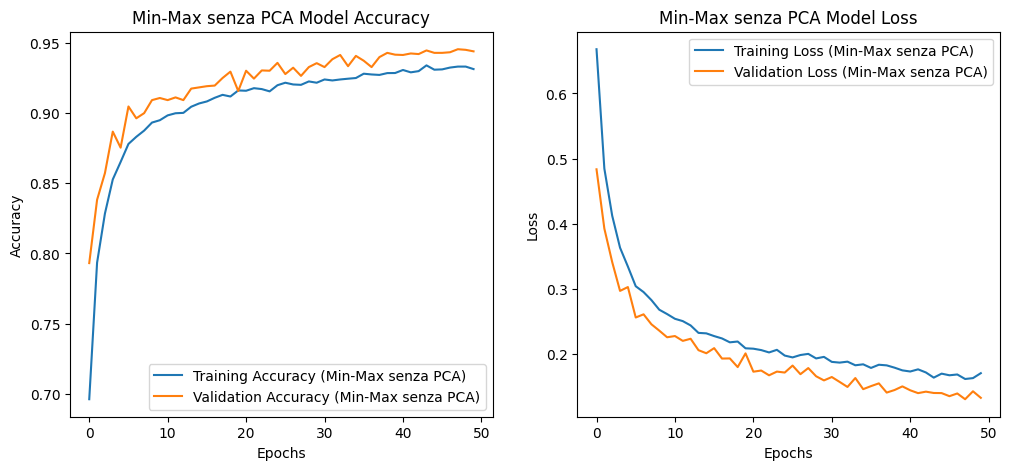

Numero di componenti principali scelti (Min-Max PCA): 10
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


580/580 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6315 - loss: 0.7909 - val_accuracy: 0.7894 - val_loss: 0.4892
Epoch 2/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7818 - loss: 0.5121 - val_accuracy: 0.8360 - val_loss: 0.3982
Epoch 3/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8188 - loss: 0.4412 - val_accuracy: 0.8561 - val_loss: 0.3613
Epoch 4/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8402 - loss: 0.3948 - val_accuracy: 0.8492 - val_loss: 0.3433
Epoch 5/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8525 - loss: 0.3709 - val_accuracy: 0.8695 - val_loss: 0.3241
Epoch 6/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8617 - loss: 0.3577 - val_accuracy: 0.8816 - val_loss: 0.3095
Epoch 7/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8697 - loss: 0.3408 - val_accuracy: 0.8846 - val_loss: 0.3007
Epoch 8/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8744 - loss: 0.3266 - val_accuracy: 0.8980 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6816 - loss: 0.6997 - val_accuracy: 0.8660 - val_loss: 0.3380
Epoch 2/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8477 - loss: 0.3727 - val_accuracy: 0.9085 - val_loss: 0.2534
Epoch 3/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8820 - loss: 0.2961 - val_accuracy: 0.9167 - val_loss: 0.2101
Epoch 4/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8995 - loss: 0.2449 - val_accuracy: 0.9310 - val_loss: 0.1851
Epoch 5/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9140 - loss: 0.2153 - val_accuracy: 0.9364 - val_loss: 0.1646
Epoch 6/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9202 - loss: 0.1979 - val_accuracy: 0.9372 - val_loss: 0.1527
Epoch 7/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9269 - loss: 0.1795 - val_accuracy: 0.9439 - val_loss: 0.1392
Epoch 8/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9352 - loss: 0.1600 - val_accuracy: 0.9534 - val_

In [8]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


X = dataset.drop(columns=['class', 'frame.number'])
y = dataset['class']


X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


label_encoder = LabelEncoder()
y_train_full_encoded = label_encoder.fit_transform(y_train_full)
y_test_encoded = label_encoder.transform(y_test)


def build_mlp_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# -- Min-Max Scaling senza PCA --#
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train_full)
X_test_scaled_minmax = scaler_minmax.transform(X_test)


model_minmax_no_pca = build_mlp_model(X_train_scaled_minmax.shape[1])
history_minmax_no_pca = model_minmax_no_pca.fit(X_train_scaled_minmax, y_train_full_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


y_test_pred_minmax_no_pca = model_minmax_no_pca.predict(X_test_scaled_minmax)
y_test_pred_classes_minmax_no_pca = tf.argmax(y_test_pred_minmax_no_pca, axis=1).numpy()

print("Test Metrics (Min-Max senza PCA):")
print(classification_report(y_test_encoded, y_test_pred_classes_minmax_no_pca))
print("Test Accuracy (Min-Max senza PCA):", accuracy_score(y_test_encoded, y_test_pred_classes_minmax_no_pca))


cm_minmax_no_pca = confusion_matrix(y_test_encoded, y_test_pred_classes_minmax_no_pca)
disp_minmax_no_pca = ConfusionMatrixDisplay(confusion_matrix=cm_minmax_no_pca, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_minmax_no_pca.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix (Min-Max senza PCA)')
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_minmax_no_pca.history['accuracy'], label='Training Accuracy (Min-Max senza PCA)')
plt.plot(history_minmax_no_pca.history['val_accuracy'], label='Validation Accuracy (Min-Max senza PCA)')
plt.title('Min-Max senza PCA Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_minmax_no_pca.history['loss'], label='Training Loss (Min-Max senza PCA)')
plt.plot(history_minmax_no_pca.history['val_loss'], label='Validation Loss (Min-Max senza PCA)')
plt.title('Min-Max senza PCA Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled_minmax)
X_test_pca = pca.transform(X_test_scaled_minmax)

print(f"Numero di componenti principali scelti (Min-Max PCA): {pca.n_components_}")

model_pca_minmax = build_mlp_model(X_train_pca.shape[1])
history_pca_minmax = model_pca_minmax.fit(X_train_pca, y_train_full_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_test_pred_pca_minmax = model_pca_minmax.predict(X_test_pca)
y_test_pred_classes_pca_minmax = tf.argmax(y_test_pred_pca_minmax, axis=1).numpy()

print("Test Metrics (Min-Max con PCA):")
print(classification_report(y_test_encoded, y_test_pred_classes_pca_minmax))
print("Test Accuracy (Min-Max con PCA):", accuracy_score(y_test_encoded, y_test_pred_classes_pca_minmax))


# -- Z-Score Scaling (senza PCA) per confronto --#
scaler_zscore = StandardScaler()
X_train_scaled_zscore = scaler_zscore.fit_transform(X_train_full)
X_test_scaled_zscore = scaler_zscore.transform(X_test)

model_zscore = build_mlp_model(X_train_scaled_zscore.shape[1])
history_zscore = model_zscore.fit(X_train_scaled_zscore, y_train_full_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_test_pred_zscore = model_zscore.predict(X_test_scaled_zscore)
y_test_pred_classes_zscore = tf.argmax(y_test_pred_zscore, axis=1).numpy()

print("Test Metrics (Z-Score):")
print(classification_report(y_test_encoded, y_test_pred_classes_zscore))
print("Test Accuracy (Z-Score):", accuracy_score(y_test_encoded, y_test_pred_classes_zscore))

**CONFUSION MATRIX**

<Figure size 800x600 with 0 Axes>

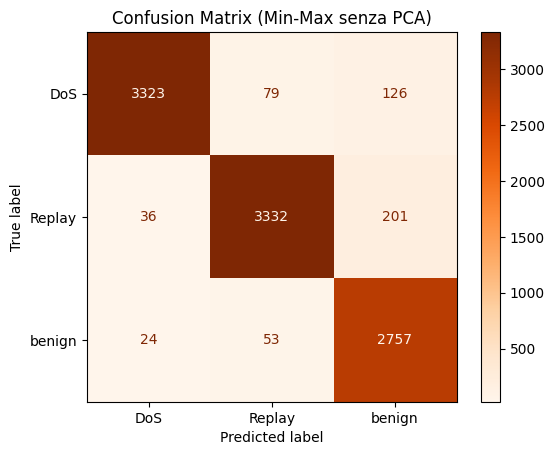

<Figure size 800x600 with 0 Axes>

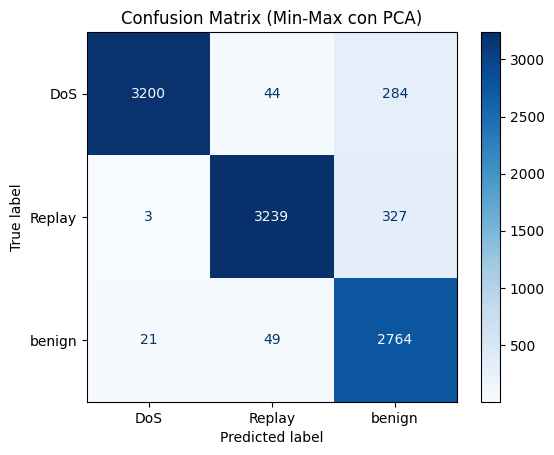

<Figure size 800x600 with 0 Axes>

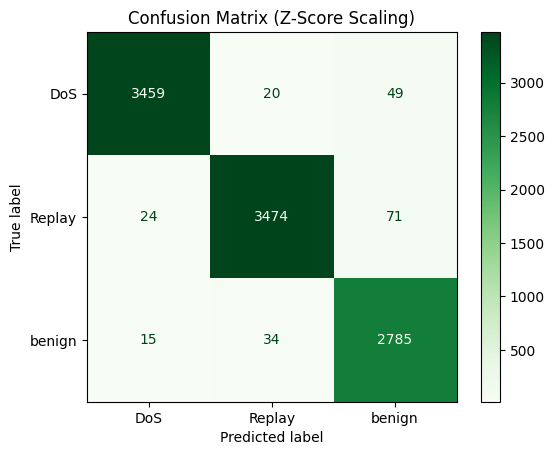

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --Min-Max senza PCA --#
cm_minmax_no_pca = confusion_matrix(y_test_encoded, y_test_pred_classes_minmax_no_pca)
disp_minmax_no_pca = ConfusionMatrixDisplay(confusion_matrix=cm_minmax_no_pca, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_minmax_no_pca.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix (Min-Max senza PCA)')
plt.show()

# --  Min-Max con PCA --#
cm_minmax_pca = confusion_matrix(y_test_encoded, y_test_pred_classes_pca_minmax)
disp_minmax_pca = ConfusionMatrixDisplay(confusion_matrix=cm_minmax_pca, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_minmax_pca.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Min-Max con PCA)')
plt.show()

# --  Z-Score  --#
cm_zscore = confusion_matrix(y_test_encoded, y_test_pred_classes_zscore)
disp_zscore = ConfusionMatrixDisplay(confusion_matrix=cm_zscore, display_labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
disp_zscore.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix (Z-Score Scaling)')
plt.show()

**The results show a better accuracy with the z-score nomrlaization method**

311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


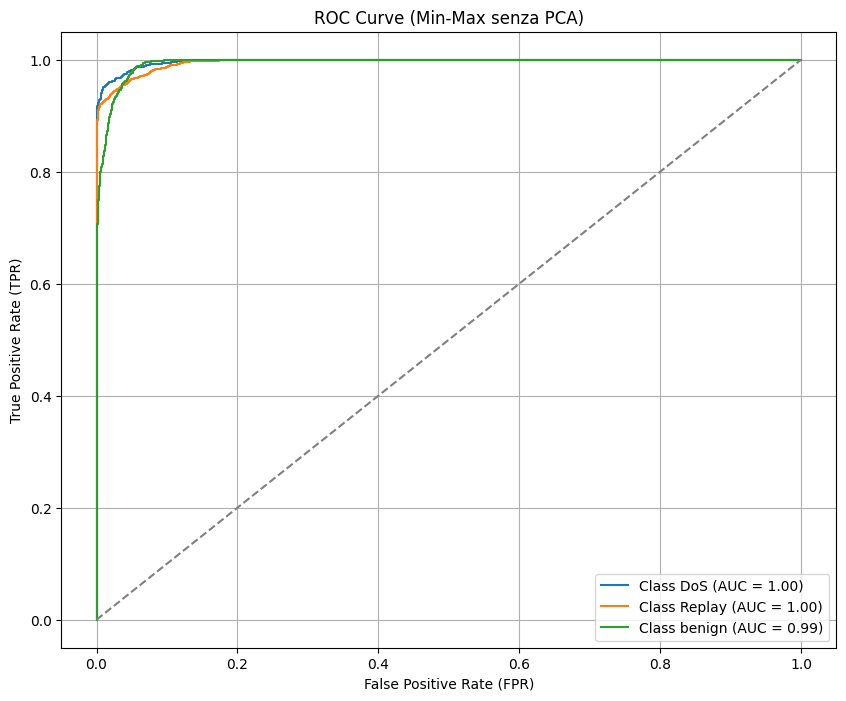

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(len(label_encoder.classes_)))


y_test_pred_prob_minmax_no_pca = model_minmax_no_pca.predict(X_test_scaled_minmax)


plt.figure(figsize=(10, 8))
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob_minmax_no_pca[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve (Min-Max senza PCA)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()